# 1.Import Libraries

In [1]:
import gensim.downloader as api
import json
from gensim.models.word2vec import Word2Vec

import pandas as pd
import numpy as np

#Kmeans
from sklearn.cluster import KMeans

#T-SNE
from sklearn.manifold import MDS, TSNE

import altair as alt
import matplotlib.pyplot as plt

#Used from INM713 Semantic Web Technologies and Knowledge Graphs Lab 5
from isub import isub
from lookup import DBpediaLookup

# 2.Download Pretrained Models

### 2.1 See available Models 

In [2]:
from gensim.models import KeyedVectors

#Embedding vectors generated above
model = KeyedVectors.load('C:/Dissertation/DBPedia embeddings/model.kv')

In [3]:
model.key_to_index

{'http://dbpedia.org/resource/Petter_Gustafsson__CareerStation__4': 4616042,
 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': 7,
 'http://dbpedia.org/ontology/CareerStation': 87,
 'http://dbpedia.org/ontology/team': 2,
 'http://dbpedia.org/resource/Skellefteå_FF': 149037,
 'http://dbpedia.org/ontology/league': 63,
 'http://dbpedia.org/resource/Swedish_Football_Division_2': 100764,
 'http://dbpedia.org/ontology/position': 81,
 'http://xmlns.com/foaf/0.1/homepage': 41,
 'https://skellefteaff.se': 4779799,
 'http://dbpedia.org/ontology/SoccerClub': 91,
 'http://dbpedia.org/ontology/ground': 10,
 'http://dbpedia.org/resource/Skellefteå': 22990,
 'http://dbpedia.org/ontology/timeZone': 42,
 'http://dbpedia.org/resource/Central_European_Summer_Time': 378,
 'http://dbpedia.org/resource/Central_European_Time': 167,
 'http://dbpedia.org/ontology/Settlement': 169,
 'http://dbpedia.org/ontology/season': 150,
 'http://dbpedia.org/resource/2019_in_Swedish_football': 31447,
 'http://dbpedia.org/o

In [4]:
model.most_similar('http://dbpedia.org/resource/German_Shepherd', topn = 100)


[('http://dbpedia.org/resource/National_Party_(1989)', 0.9303353428840637),
 ('http://dbpedia.org/resource/Tinnoset', 0.9271053671836853),
 ('http://dbpedia.org/resource/Isaac_Watts_(naval_architect)',
  0.9260996580123901),
 ('http://dbpedia.org/resource/Erasure_code', 0.9244734048843384),
 ('http://dbpedia.org/resource/Ioan_Axente_Sever', 0.9222206473350525),
 ('http://dbpedia.org/resource/Thomas_Mermall', 0.9221068024635315),
 ('http://dbpedia.org/resource/Víctor_Pey', 0.9210785627365112),
 ('http://dbpedia.org/resource/Patrick_Lundborg', 0.9210147857666016),
 ('http://dbpedia.org/resource/Benedict_Chapman', 0.9201316237449646),
 ('http://dbpedia.org/resource/Burger_Branch', 0.9190332293510437),
 ('http://dbpedia.org/resource/Glyn_Colledge', 0.9189954400062561),
 ('http://dbpedia.org/resource/As-Suwaydi_(physician)', 0.9189026355743408),
 ('http://dbpedia.org/resource/Benjamin_Brook', 0.9186503887176514),
 ('http://dbpedia.org/resource/Robert_Östling', 0.9186327457427979),
 ('http:/

# 3. Import Animal Data

### 3.1 Animal Classes

In [5]:
classes_df = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/classes.txt", sep = '\t',header = None, names = ['labels','classes'])
classes_df['word2vec_names'] = classes_df['classes']
classes_df['word2vec_names'] = classes_df['word2vec_names'].str.replace('+','_')
classes_df['word2vec_names'] = classes_df['word2vec_names'].str.capitalize()
classes_df.at[4,'word2vec_names']='Dalmatian_(dog)'
classes_df.at[5,'word2vec_names']='Persian_cat'
#https://www.science.org/doi/10.1126/sciadv.aap9873
classes_df.at[7,'word2vec_names']='German_Shepherd'
classes_df.at[9,'word2vec_names']='Cat'
classes_df.at[11,'word2vec_names']='Mole_(animal)'
classes_df.at[23,'word2vec_names']='Fur_seal'
classes_df.at[32,'word2vec_names']='Chihuahua_(dog)'
classes_df.at[36,'word2vec_names']='American_bison'
classes_df.at[45,'word2vec_names']='Rough_Collie'
classes_df.at[48,'word2vec_names']='Cattle'
classes_df

C:\Users\Abhimanyu Acharya\AppData\Local\Temp\ipykernel_25256\3113903789.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  classes_df['word2vec_names'] = classes_df['word2vec_names'].str.replace('+','_')


,labels,classes,word2vec_names
0,1,antelope,Antelope
1,2,grizzly+bear,Grizzly_bear
2,3,killer+whale,Killer_whale
3,4,beaver,Beaver
4,5,dalmatian,Dalmatian_(dog)
5,6,persian+cat,Persian_cat
6,7,horse,Horse
7,8,german+shepherd,German_Shepherd
8,9,blue+whale,Blue_whale
9,10,siamese+cat,Cat


### 3.2 Taxonomy

In [6]:
taxonomy_df = pd.read_csv("C:/Dissertation/Data/Mammal Taxonomy/Mammal Taxonomy_noduplicates.csv")
taxonomy_df.head()

,sciName,animal_label,animal_class,mainCommonName,otherCommonNames,class,infraclass,magnorder,superorder,order,...,infraorder,parvorder,superfamily,family,subfamily,tribe,genus,subgenus,biogeographicRealm,CMW_sciName
0,Antilope_cervicapra,1,antelope,Blackbuck,Indian Antelope,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,...,PECORA,NaN,NaN,BOVIDAE,ANTILOPINAE,ANTILOPINI,Antilope,NaN,Palearctic,Antilope_cervicapra
1,Ursus_arctos,2,grizzly+bear,Brown Bear,Grizzly Bear|Kodiak Bear,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,...,ARCTOIDEA,NaN,URSOIDEA,URSIDAE,URSINAE,NaN,Ursus,NaN,Nearctic|Palearctic,Ursus_arctos
2,Orcinus_orca,3,killer+whale,Killer Whale,Orca,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,...,CETACEA,ODONTOCETI,DELPHINOIDEA,DELPHINIDAE,INCERTAE SEDIS,NaN,Orcinus,NaN,Marine,Orcinus_orca
3,Aplodontia_rufa,4,beaver,Mountain Beaver,Boomer|Sewellel|Point Arena Mountain Beaver|Po...,Mammalia,Placentalia,Boreoeutheria,Euarchontoglires,RODENTIA,...,NaN,NaN,NaN,APLODONTIIDAE,NaN,NaN,Aplodontia,NaN,Nearctic,Aplodontia_rufa
4,Canis_familiaris,5,dalmatian,Domestic Dog,Dog|Dingo|Feral Dog|New Guinea Singing Dog|Vil...,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,...,CANOIDEA,NaN,NaN,CANIDAE,NaN,NaN,Canis,NaN,Domesticated,Canis_familiaris


In [7]:
stringToURI = dict()

def createURIForEntity(name, useExternalURI):
    stringToURI[name] = name.replace(" ", "_")
    
    if useExternalURI is True: #We connect to online KG
        uri = getExternalKGURI(name)
        if uri!="":
            stringToURI[name]=uri
    
    return stringToURI[name]

  
def getExternalKGURI(name):
    entities = DBpediaLookup().getKGEntities(name, 2)
    current_sim = -1
    current_uri=''
    for ent in entities:           
        isub_score = isub(name, ent.label) 
        if current_sim < isub_score:
            current_uri = ent.ident
            current_sim = isub_score    
        
    return current_uri 

In [8]:
#for classes in classes_df['word2vec_names']:
    #print(classes)
    #print(createURIForEntity(classes,True))

# 4. Generate Word2Ven Embeddings for each animal Class

In [9]:
class_kg_embeddings = {}
for classes in classes_df['word2vec_names']:
    print('http://dbpedia.org/resource/' + classes)
    class_kg_embeddings.update({classes: model['http://dbpedia.org/resource/' + classes]})    

http://dbpedia.org/resource/Antelope
http://dbpedia.org/resource/Grizzly_bear
http://dbpedia.org/resource/Killer_whale
http://dbpedia.org/resource/Beaver
http://dbpedia.org/resource/Dalmatian_(dog)
http://dbpedia.org/resource/Persian_cat
http://dbpedia.org/resource/Horse
http://dbpedia.org/resource/German_Shepherd
http://dbpedia.org/resource/Blue_whale
http://dbpedia.org/resource/Cat
http://dbpedia.org/resource/Skunk
http://dbpedia.org/resource/Mole_(animal)
http://dbpedia.org/resource/Tiger
http://dbpedia.org/resource/Hippopotamus
http://dbpedia.org/resource/Leopard
http://dbpedia.org/resource/Moose
http://dbpedia.org/resource/Spider_monkey
http://dbpedia.org/resource/Humpback_whale
http://dbpedia.org/resource/Elephant
http://dbpedia.org/resource/Gorilla
http://dbpedia.org/resource/Ox
http://dbpedia.org/resource/Fox
http://dbpedia.org/resource/Sheep
http://dbpedia.org/resource/Fur_seal
http://dbpedia.org/resource/Chimpanzee
http://dbpedia.org/resource/Hamster
http://dbpedia.org/resour

In [10]:
KG_embeddiongs_df = pd.DataFrame.from_dict(class_kg_embeddings)
KG_embeddiongs_df = KG_embeddiongs_df.T
KG_embeddiongs_df = KG_embeddiongs_df.reset_index()
KG_embeddiongs_df = pd.merge(KG_embeddiongs_df,classes_df, left_on = 'index', right_on = 'word2vec_names')
KG_embeddiongs_df.drop(['index'],1,inplace = True)
KG_embeddiongs_df.to_csv("C:\Dissertation\Data\Processed Data\DBpedia_continous_vectors.csv")
KG_embeddiongs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,labels,classes,word2vec_names
0,0.120490,-0.019176,0.047720,0.046650,0.049864,-0.013366,0.030514,-0.020177,0.036296,0.001765,...,0.007348,0.037995,-0.105779,-0.054327,-0.045315,0.046075,0.020150,1,antelope,Antelope
1,0.041990,0.015467,0.157082,0.235951,0.081698,-0.264080,-0.200077,0.001268,-0.033363,-0.334853,...,-0.521511,-0.085866,-0.347998,-0.408432,-0.063729,0.040160,0.015981,2,grizzly+bear,Grizzly_bear
2,-0.016773,-0.072784,0.020245,-0.079250,-0.283307,0.008599,-0.209156,0.693520,-0.223982,-0.182285,...,-0.479906,0.027154,-0.733937,-0.332802,-0.040294,0.194456,0.350730,3,killer+whale,Killer_whale
3,0.131123,0.052078,0.034428,0.023570,0.395731,0.262555,0.053123,0.040119,-0.157894,0.022913,...,-0.094001,0.109869,-0.181936,-0.179589,-0.110668,0.171825,-0.035862,4,beaver,Beaver
4,0.100328,-0.013044,0.020032,0.025136,0.070615,0.007612,0.039044,-0.008946,0.023455,-0.010019,...,0.011255,0.051968,-0.100038,-0.038306,-0.022925,0.033603,-0.008446,5,dalmatian,Dalmatian_(dog)


# 5. K-Means clustering + spatialisation

In [11]:
labels = KG_embeddiongs_df['classes']
kmeans = KMeans(n_clusters=26, random_state=0)
kmeans.fit(KG_embeddiongs_df.iloc[:,:-3])
clusters = kmeans.predict(KG_embeddiongs_df.iloc[:,:-3])
clusters_df = pd.DataFrame(data = clusters
             , columns = ['K_mean'])
clusters_df.head()

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,K_mean
0,1
1,8
2,12
3,22
4,1


In [12]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)

#Continous
TSNE_continous= tsne.fit_transform(KG_embeddiongs_df.iloc[:,:-3]) 
TSNE_continous_df = pd.DataFrame(data = TSNE_continous
             , columns = ['Continous comp-1', 'Continous comp-2'])

#concat
TSNE_continous_df1 = pd.concat([TSNE_continous_df, labels], axis = 1)
TSNE_continous_df1 = pd.concat([TSNE_continous_df1, taxonomy_df['order']], axis = 1)
TSNE_continous_df1 = pd.concat([TSNE_continous_df1, taxonomy_df['family']], axis = 1)
TSNE_continous_df1 = pd.concat([TSNE_continous_df1, clusters_df['K_mean']], axis = 1)

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 1.769970
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.696945
[t-SNE] KL divergence after 1000 iterations: 0.419112


C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [14]:
source = TSNE_continous_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Continous comp-1:Q',
    y='Continous comp-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=10
).encode(
    text='classes:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

alt.LayerChart(...)

In [16]:
source = TSNE_continous_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Continous comp-1:Q',
    y='Continous comp-2:Q',
    color=alt.Color('family:N', scale=alt.Scale(scheme='Spectral'))
    ).properties(
    width=800,
    height=800
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='classes:N'
)

points.interactive() + text

alt.LayerChart(...)

# 6. Convert to Binary Vectors

In [24]:
b = np.where(KG_embeddiongs_df.iloc[:,:-3]>=0, 1, KG_embeddiongs_df.iloc[:,:-3])
b = np.where(b<0, 0, b)
binary_attributes_df = pd.DataFrame(data = b)
binary_attributes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


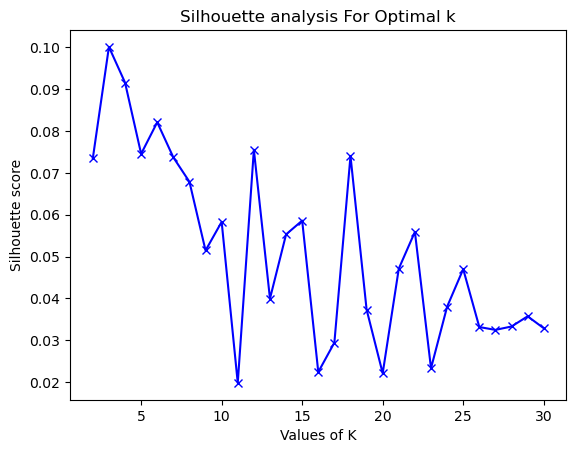

In [18]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30]
silhouette_avg = []
for num_clusters in range_n_clusters: 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(binary_attributes_df)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(binary_attributes_df, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [19]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 31)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(binary_attributes_df)
 
    distortions.append(sum(np.min(cdist(binary_attributes_df, kmeanModel.cluster_centers_,
                                        'cosine'), axis=1)) /binary_attributes_df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(binary_attributes_df, kmeanModel.cluster_centers_,
                                   'cosine'), axis=1)) / binary_attributes_df.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


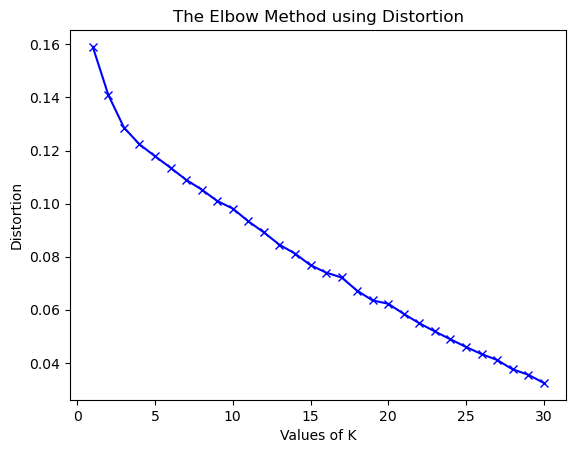

In [20]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

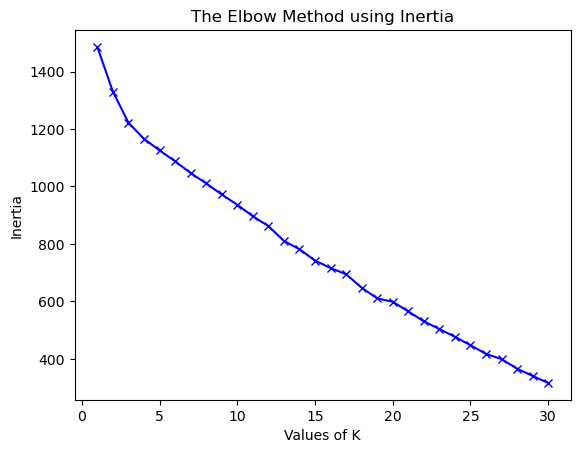

In [21]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [25]:
labels = KG_embeddiongs_df['classes']
kmeans = KMeans(n_clusters=12, random_state=0)
kmeans.fit(binary_attributes_df)
clusters = kmeans.predict(binary_attributes_df)
clusters_df = pd.DataFrame(data = clusters
             , columns = ['K_mean'])
clusters_df.head()

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,K_mean
0,2
1,7
2,3
3,3
4,2


In [26]:
binary_attributes_df = pd.concat([binary_attributes_df, labels], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, taxonomy_df['order']], axis =  1)
binary_attributes_df = pd.concat([binary_attributes_df, taxonomy_df['family']], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, clusters_df['K_mean']], axis = 1)
binary_attributes_df.to_csv("C:\Dissertation\Data\Processed Data\DBpedia_binary_vectors.csv")
binary_attributes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,classes,order,family,K_mean
0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,antelope,ARTIODACTYLA,BOVIDAE,2
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,grizzly+bear,CARNIVORA,URSIDAE,7
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,killer+whale,ARTIODACTYLA,DELPHINIDAE,3
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,beaver,RODENTIA,APLODONTIIDAE,3
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,dalmatian,CARNIVORA,CANIDAE,2


# 7. Spatialise Binary vectors

In [28]:
tsne = TSNE(n_components=2, verbose=0, random_state=100, metric = 'cosine', perplexity=15.0)
#binary
tsne_binary= tsne.fit_transform(binary_attributes_df.iloc[:,:-4]) 
tsne_binary_df = pd.DataFrame(data = tsne_binary
             , columns = ['binarycomp-1', 'binarycomp-2'])

#concat
tsne_binary_df1 = pd.concat([tsne_binary_df, labels], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['order']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['family']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, clusters_df['K_mean']], axis = 1)

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [29]:
source = tsne_binary_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='binarycomp-1:Q',
    y='binarycomp-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='classes:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

alt.LayerChart(...)